# US Rent of primary residence research

source:
https://beta.bls.gov/dataQuery/find?st=100&r=100&s=popularity%3AD&q=rent+of+primary&fq=survey:[cu]&more=0

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=748&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=CUUR0000SEHA&scale=left&cosd=1914-12-01&coed=2020-08-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2020-10-06&revision_date=2020-10-06&nd=1914-12-01',na_values='.')
df

,DATE,CUUR0000SEHA
0,1914-12-01,21.000
1,1915-01-01,NaN
2,1915-02-01,NaN
3,1915-03-01,NaN
4,1915-04-01,NaN
...,...,...
1264,2020-04-01,340.135
1265,2020-05-01,340.811
1266,2020-06-01,341.294
1267,2020-07-01,341.950


In [25]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['CUUR0000SEHA'] = df['CUUR0000SEHA'].astype(float)

In [26]:
df.dtypes

DATE            datetime64[ns]
CUUR0000SEHA           float64
dtype: object

In [28]:
df.describe()

,CUUR0000SEHA
count,1008.000000
mean,114.020780
std,92.367829
min,21.000000
25%,37.075000
50%,70.000000
75%,178.025000
max,342.444000


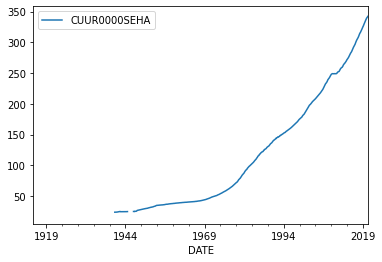

In [74]:
df.plot(x='DATE',y='CUUR0000SEHA', kind='line')
plt.show()

In [73]:
import requests
import json
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['CUUR0120SEHA']})#,"startyear":"2011", "endyear":"2014"})
p = requests.post('https://api.bls.gov/publicAPI/v1/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)

for series in json_data['Results']['series']:
  data = series['data']
data = json.dumps(data)
pd.read_json(data)

,year,period,periodName,latest,value,footnotes
0,2020,M08,August,true,106.966,[{}]
1,2020,M07,July,NaN,106.879,[{}]
2,2020,M06,June,NaN,106.619,[{}]
3,2020,M05,May,NaN,106.478,[{}]
4,2020,M04,April,NaN,106.379,[{}]
5,2020,M03,March,NaN,106.167,[{}]
6,2020,M02,February,NaN,105.934,[{}]
7,2020,M01,January,NaN,105.780,[{}]
8,2019,M12,December,NaN,105.469,[{}]
9,2019,M11,November,NaN,105.361,[{}]


In [30]:
pd.read_excel('https://www.huduser.gov/portal/datasets/50thper/FY2020_50_County_rev.xlsx')

,fips2010,rent50_0,rent50_1,rent50_2,rent50_3,rent50_4,state,cbsasub20,areaname20,county,cousub,cntyname,name,pop2017,hu2017,state_alpha
0,4805999999,673,699,920,1209,1560,48,METRO10180M10180,"Abilene, TX MSA",59,99999,Callahan County,Callahan County,13660,6637,TX
1,4825399999,673,699,920,1209,1560,48,METRO10180M10180,"Abilene, TX MSA",253,99999,Jones County,Jones County,19970,7292,TX
2,4844199999,673,699,920,1209,1560,48,METRO10180M10180,"Abilene, TX MSA",441,99999,Taylor County,Taylor County,135370,56978,TX
3,7200399999,386,397,452,591,713,72,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",3,99999,Aguada Municipio,Aguada Municipio,39470,17385,PR
4,7200599999,386,397,452,591,713,72,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",5,99999,Aguadilla Municipio,Aguadilla Municipio,55720,27301,PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4762,7213399999,370,373,437,582,656,72,NCNTY72923N72923,Puerto Rico HUD Nonmetro Area,133,99999,Santa Isabel Municipio,Santa Isabel Municipio,22475,9417,PR
4763,7214799999,370,373,437,582,656,72,NCNTY72923N72923,Puerto Rico HUD Nonmetro Area,147,99999,Vieques Municipio,Vieques Municipio,8930,5101,PR
4764,7801099999,887,905,1105,1377,1497,78,NCNTY78010N78010,"St. Croix Island, VI",10,99999,St. Croix,St. Croix,53234,25275,VI
4765,7802099999,1177,1394,1733,2160,2348,78,NCNTY78020N78020,"St. John Island, VI",20,99999,St. John,St. John,4197,3453,VI


In [31]:
pd.read_excel('https://www.huduser.gov/portal/datasets/50thper/FY2020_50_FMRArea_rev2.xlsx')

,state,cbsasub20,areaname20,rent50_0,rent50_1,rent50_2,rent50_3,rent50_4,state_alpha,pop2017,pop2010,hu2010,hu2017
0,48,METRO10180M10180,"Abilene, TX MSA",673,699,920,1209,1560,TX,169000,165252,69721,70907
1,72,METRO10380M10380,"Aguadilla-Isabela, PR HUD Metro FMR Area",386,397,452,591,713,PR,284885,306292,138855,132749
2,72,METRO10380N72141,"Utuado Municipio, PR HUD Metro FMR Area",379,390,444,553,601,PR,30210,33149,14192,13315
3,39,METRO10420M10420,"Akron, OH MSA",600,709,912,1147,1235,OH,703400,703200,312581,314354
4,13,METRO10500M10500,"Albany, GA MSA",643,666,791,1031,1151,GA,153775,157308,66060,66842
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2592,69,NCNTY69999N69999,Northern Mariana Islands,515,600,790,1140,1373,MP,53883,53883,20850,20850
2593,72,NCNTY72923N72923,Puerto Rico HUD Nonmetro Area,370,373,437,582,656,PR,150810,158265,69208,66786
2594,78,NCNTY78010N78010,"St. Croix Island, VI",887,905,1105,1377,1497,VI,53234,53234,25275,25275
2595,78,NCNTY78020N78020,"St. John Island, VI",1177,1394,1733,2160,2348,VI,4197,4197,3453,3453


In [35]:
!pip install python-docx

     |████████████████████████████████| 5.5MB 2.6MB/s 
  Created wheel for python-docx: filename=python_docx-0.8.10-cp36-none-any.whl size=184491 sha256=367863ed52728d6a4c599e1176130816135ad2d445664ae3ea4973a509d08141
  Stored in directory: /root/.cache/pip/wheels/18/0b/a0/1dd62ff812c857c9e487f27d80d53d2b40531bec1acecfa47b
Successfully built python-docx


In [36]:
import docx

In [38]:
!wget https://www.huduser.gov/portal/datasets/50thper/FY2020_50th_ReadMe.docx

--2020-10-06 22:57:27--  https://www.huduser.gov/portal/datasets/50thper/FY2020_50th_ReadMe.docx
Resolving www.huduser.gov (www.huduser.gov)... 96.127.43.83
Connecting to www.huduser.gov (www.huduser.gov)|96.127.43.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13842 (14K) [application/vnd.openxmlformats-officedocument.wordprocessingml.document]
Saving to: ‘FY2020_50th_ReadMe.docx’

FY2020_50th_ReadMe. 100%[===================>]  13.52K  --.-KB/s    in 0s      

2020-10-06 22:57:27 (314 MB/s) - ‘FY2020_50th_ReadMe.docx’ saved [13842/13842]



In [41]:
readme = docx.Document('/content/FY2020_50th_ReadMe.docx')

In [43]:
print(readme.paragraphs)

[<docx.text.paragraph.Paragraph object at 0x7fe5cfb0c908>, <docx.text.paragraph.Paragraph object at 0x7fe5cfb0c978>, <docx.text.paragraph.Paragraph object at 0x7fe5cfb0c2b0>, <docx.text.paragraph.Paragraph object at 0x7fe5cfb0c198>, <docx.text.paragraph.Paragraph object at 0x7fe5cfb0c9e8>, <docx.text.paragraph.Paragraph object at 0x7fe5cfb0cb38>, <docx.text.paragraph.Paragraph object at 0x7fe5cfb0cac8>, <docx.text.paragraph.Paragraph object at 0x7fe5cfb0cba8>, <docx.text.paragraph.Paragraph object at 0x7fe5cfb0cb00>, <docx.text.paragraph.Paragraph object at 0x7fe5cfb0c780>, <docx.text.paragraph.Paragraph object at 0x7fe5cfb0cb70>, <docx.text.paragraph.Paragraph object at 0x7fe5cfb0cc88>]


In [46]:
for p in readme.paragraphs:
  print(p.text)

These files make available the 50th percentile rents for fiscal year (FY) 2020 by FMR area, county or county subarea (New England). 

THESE ARE NOT FAIR MARKET RENTS.  

Under certain conditions, as set forth at 24 CFR §982.503(e), these 50th percentile rents may be used to set success rate payment standards. HUD has developed 50th percentile rents for this purpose. The success rate payment standards program has been in effect since FY 2001, therefore, these 50th percentile rents are only available back to FY 2001. 

In FY2020, there are no areas designated as 50th percentile FMR Areas.  HUD eliminated the 50th percentile FMR policy as part of the Small Area FMR Rulemaking (81 FR 80567, November 16, 2016).

There is one record per county or county subarea (New England town).  The rents for all component counties of a metropolitan Fair Market Rent Area ("MSA") or HUD Metropolitan FMR Area (HMFA) are the same, so there will be duplicative rents for each county in a metropolitan area.  



In [51]:
'\n'.join([p.text for p in readme.paragraphs])

'These files make available the 50th percentile rents for fiscal year (FY) 2020 by FMR area, county or county subarea (New England). \n\nTHESE ARE NOT FAIR MARKET RENTS.  \n\nUnder certain conditions, as set forth at 24 CFR §982.503(e), these 50th percentile rents may be used to set success rate payment standards. HUD has developed 50th percentile rents for this purpose. The success rate payment standards program has been in effect since FY 2001, therefore, these 50th percentile rents are only available back to FY 2001. \n\nIn FY2020, there are no areas designated as 50th percentile FMR Areas.  HUD eliminated the 50th percentile FMR policy as part of the Small Area FMR Rulemaking (81 FR 80567, November 16, 2016).\n\nThere is one record per county or county subarea (New England town).  The rents for all component counties of a metropolitan Fair Market Rent Area ("MSA") or HUD Metropolitan FMR Area (HMFA) are the same, so there will be duplicative rents for each county in a metropolitan 

In [52]:
!wget https://www.huduser.gov/portal/datasets/hads/hads2013n_ASCII.zip

--2020-10-06 23:25:52--  https://www.huduser.gov/portal/datasets/hads/hads2013n_ASCII.zip
Resolving www.huduser.gov (www.huduser.gov)... 96.127.43.83
Connecting to www.huduser.gov (www.huduser.gov)|96.127.43.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11501979 (11M) [application/x-zip-compressed]
Saving to: ‘hads2013n_ASCII.zip’

hads2013n_ASCII.zip 100%[===================>]  10.97M  6.41MB/s    in 1.7s    

2020-10-06 23:25:54 (6.41 MB/s) - ‘hads2013n_ASCII.zip’ saved [11501979/11501979]



In [57]:
from zipfile import ZipFile

In [59]:
with ZipFile('/content/hads2013n_ASCII.zip', 'r') as f:
  f.extractall('temp')

In [69]:
pd.read_csv('/content/temp/thads2013n.txt')

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'100003130103',82,'3','1',73738,956,15738,26213,40322,11067,2,2006,'1',1,40000,-6,'1',1,6,3117.394239,1,18021,'1',533,1,'1',169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,'1 Adequate','-5','2000-2009','1 Single Family','2 2BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','1 LTE 50% FMR','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','.','2 30% to 50%','-5','-5'
1,'100006110249',50,'5','3',55846,1100,17165,28604,45744,24218,4,1980,'1',1,130000,-6,'1',1,6,2150.725544,4,122961,'1',487,1,'1',245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','3 150-200% Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','3 GT FMR','4 60 - 80% AMI','4 60 - 80% AMI','6 100 - 120% AMI','4 60 - 80% AMI','7 120% AMI +','.','1 Less than 30%','-5','-5'
2,'100006370140',53,'5','3',55846,1100,13750,22897,36614,15470,4,1985,'1',1,150000,-6,'1',1,7,2213.789404,2,27974,'1',1405,1,'1',159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','4 60 - 80% AMI','5 80 - 100% AMI','6 100 - 120% AMI','4 60 - 80% AMI','4 60 - 80% AMI','.','3 50% or More','-5','-5'
3,'100006520140',67,'5','3',55846,949,13750,22897,36614,13964,3,1985,'1',1,200000,-6,'1',1,6,2364.585097,2,32220,'1',279,1,'1',179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,'1 Adequate','-5','1980-1989','1 Single Family','3 3BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','6 100 - 120% AMI','7 120% AMI +','7 120% AMI +','5 80 - 100% AMI','4 60 - 80% AMI','.','1 Less than 30%','-5','-5'
4,'100007130148',26,'1','3',60991,737,14801,24628,39421,15492,2,1980,'1',1,-6,-6,'2',100,4,2314.524902,2,96874,'1',759,5,'2',146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.98